In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 



# 1. Data Preparation:
### Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [66]:
df = pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\Decision Tree\Decision Tree\heart_disease.xlsx", sheet_name = 1)

In [67]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
5,66,Male,asymptomatic,160,228,False,lv hypertrophy,138,False,2.3,upsloping,fixed defect,0
6,56,Male,non-anginal,130,276,False,normal,128,True,1.0,upsloping,fixed defect,0
7,48,Male,non-anginal,110,211,False,normal,138,False,0.0,downsloping,fixed defect,0
8,57,Male,atypical angina,140,260,True,normal,140,False,0.0,downsloping,fixed defect,0
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0


# 2. Exploratory Data Analysis (EDA):
### Perform exploratory data analysis to understand the structure of the dataset.
### Check for missing values, outliers, and inconsistencies in the data.
### Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [69]:
df.shape

(908, 13)

In [70]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [71]:
null_values = df[df.isnull().any(axis=1)]
null_values

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,FALSE,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,TURE,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,TURE,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,TURE,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,TURE,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [72]:
median_old_peak = df['oldpeak'].median()
df['oldpeak'].fillna(median_old_peak, inplace=True)

In [73]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [74]:
df.duplicated().sum()

1

In [75]:
df = df.drop_duplicates()

In [76]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print("\nUnique Values in", column, ":", unique_values)


Unique Values in sex : ['Male' 'Female']

Unique Values in cp : ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Unique Values in restecg : ['lv hypertrophy' 'normal' 'st-t abnormality']

Unique Values in exang : [False True 'FALSE' 'TURE']

Unique Values in slope : ['downsloping' 'flat' 'upsloping']

Unique Values in thal : ['fixed defect' 'normal' 'reversable defect']


In [77]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.865491,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.060629,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


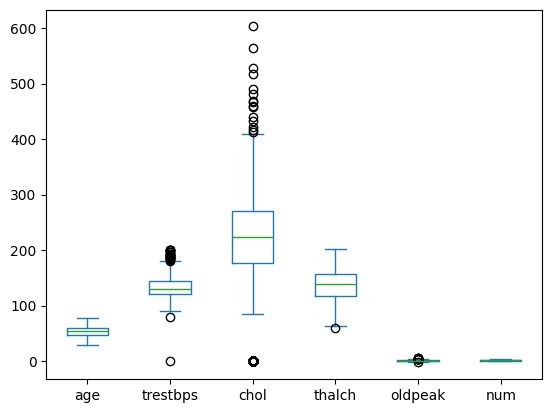

In [78]:
# Outliers checking
df.plot(kind = 'box')
plt.show()

In [79]:
# Function to replace outliers with the nearest non-outlier value
def replace_outliers(series):
    if np.issubdtype(series.dtype, np.number):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the nearest non-outlier value
        series[series < lower_bound] = series[series >= lower_bound].min()
        series[series > upper_bound] = series[series <= upper_bound].max()
    return series

# Apply the function to each column of the DataFrame
df_cleaned = df.apply(replace_outliers, axis=0)

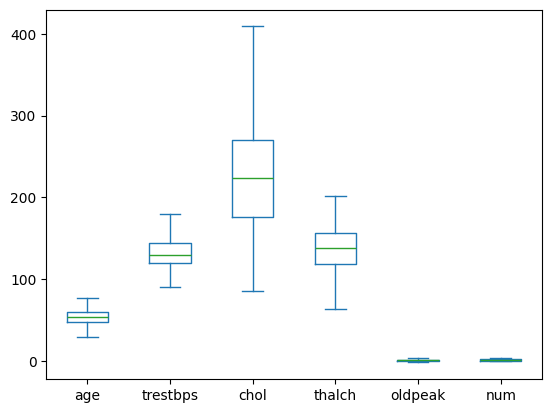

In [80]:
# Cleaned Data
df.plot(kind = 'box')
plt.show()

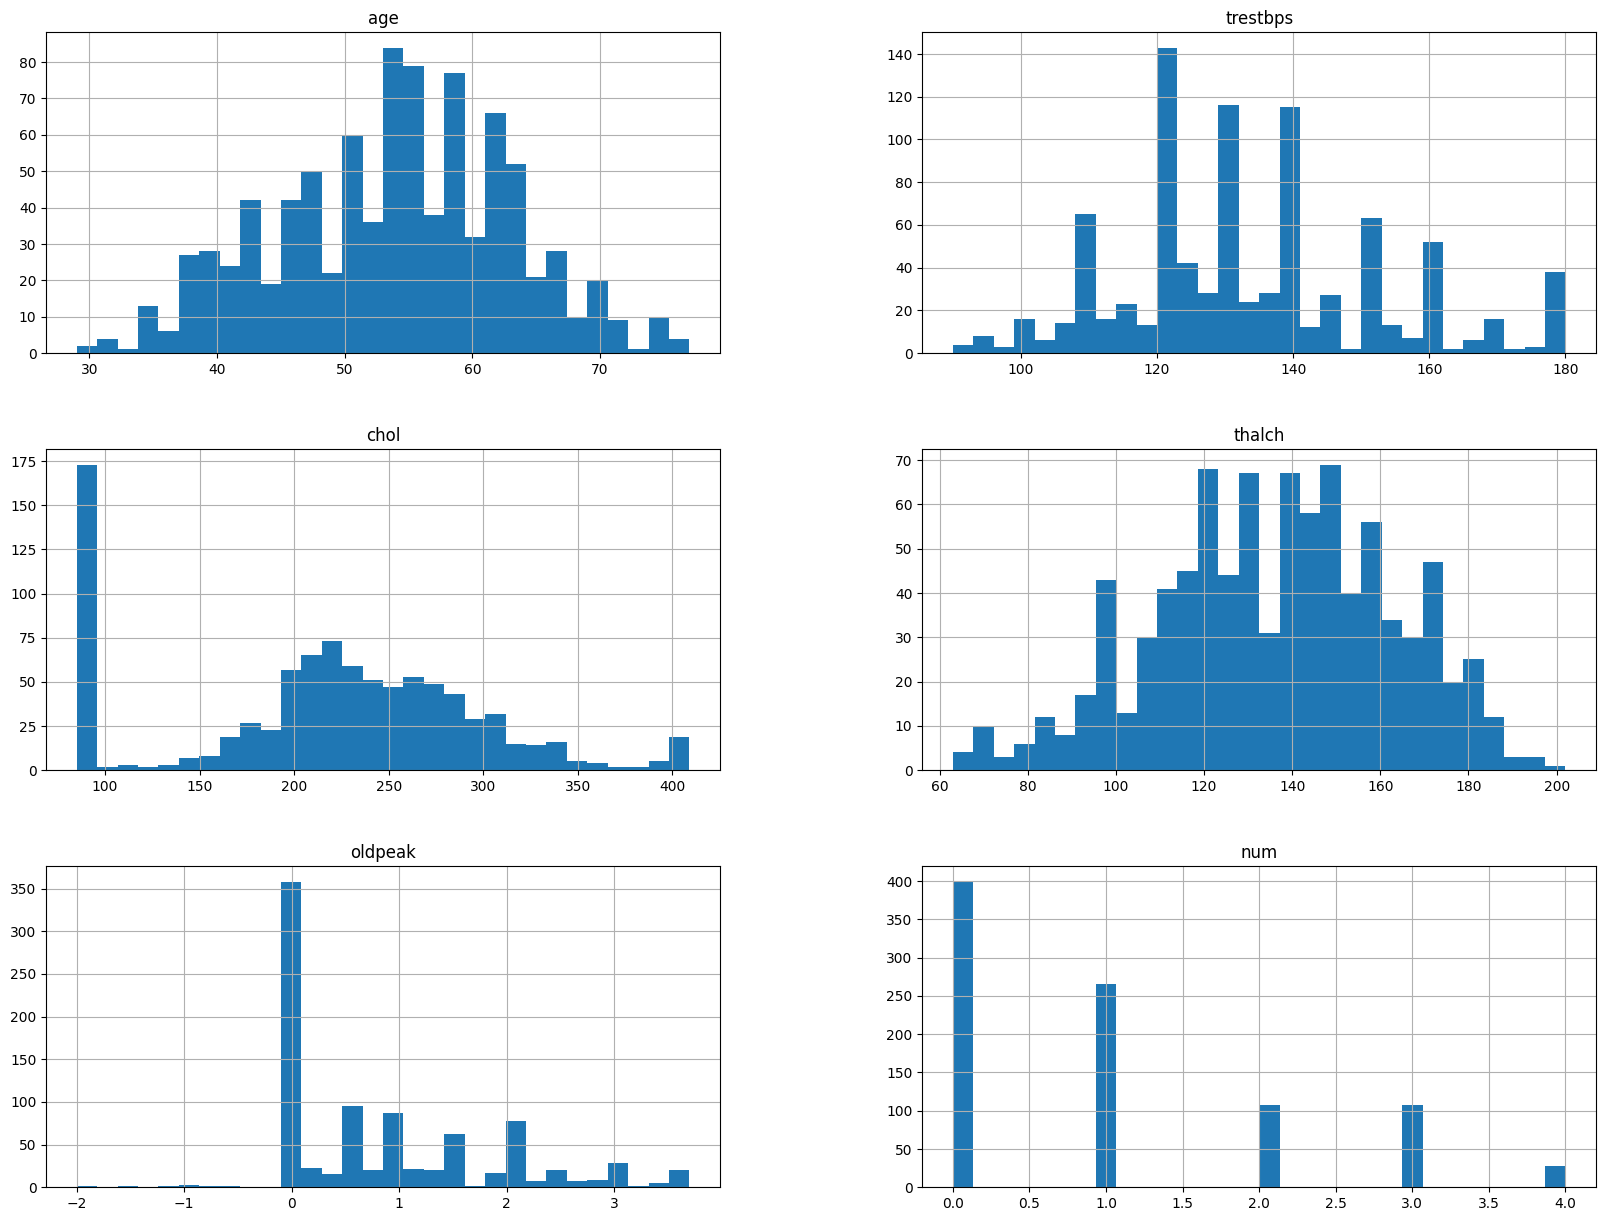

In [81]:
# Histograms
df.hist(bins=30, figsize=(20, 15))
plt.show()


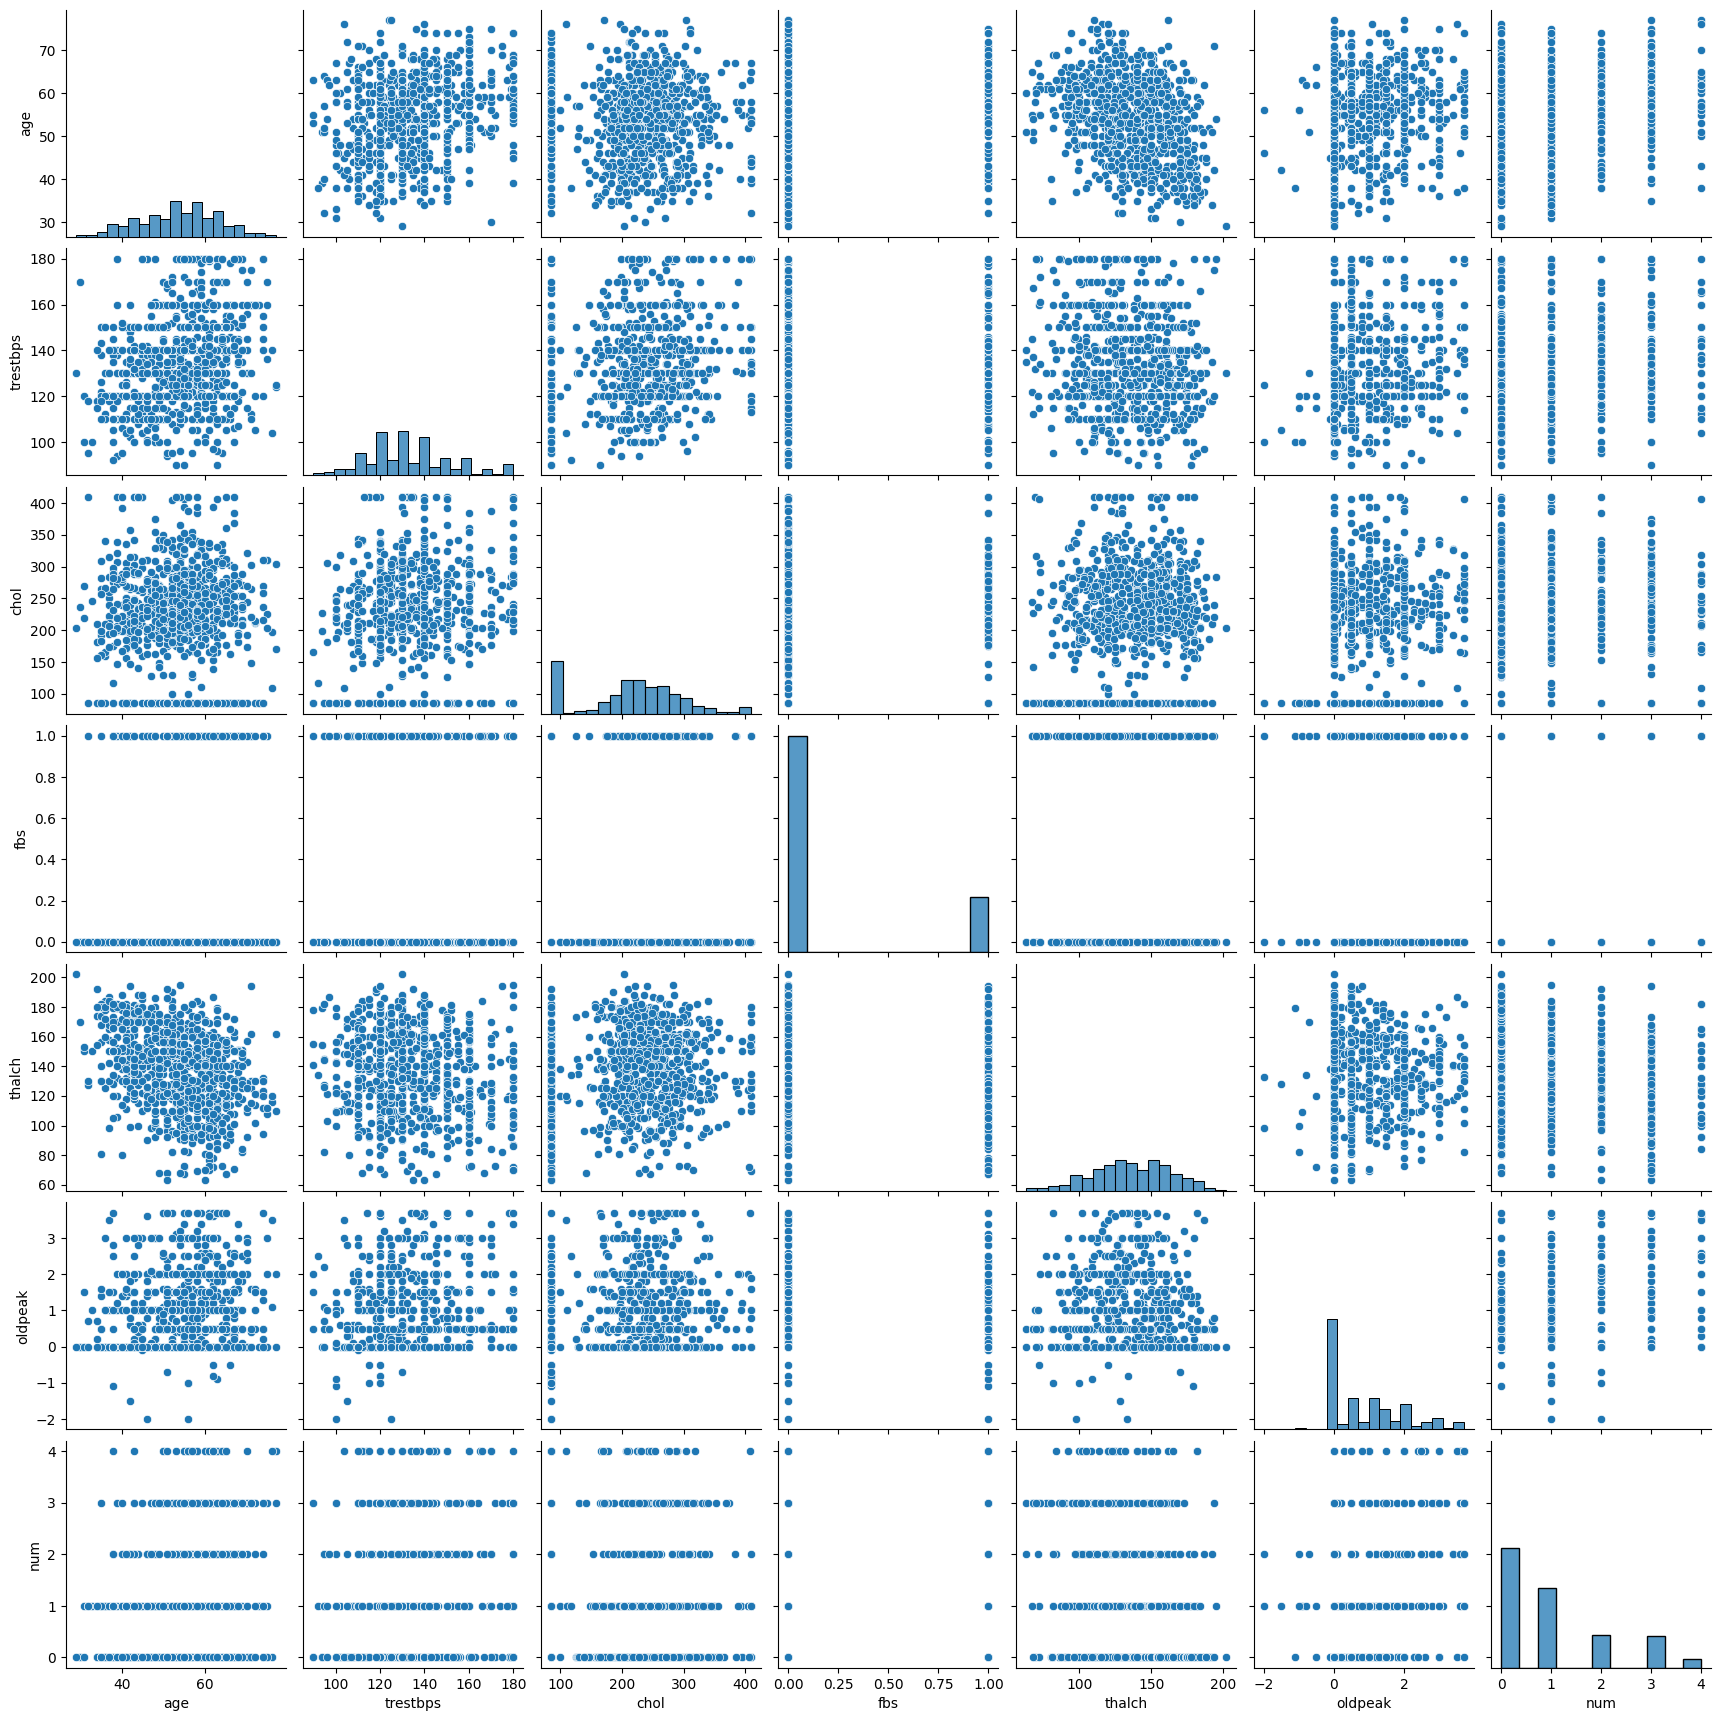

In [82]:
# Pair plot
sns.pairplot(df)
plt.show()

# 3. Feature Engineering:
### If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [83]:
df1 = df_cleaned

In [84]:
df_encoded = pd.get_dummies(df1, columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])
df_encoded = df_encoded.astype(int)

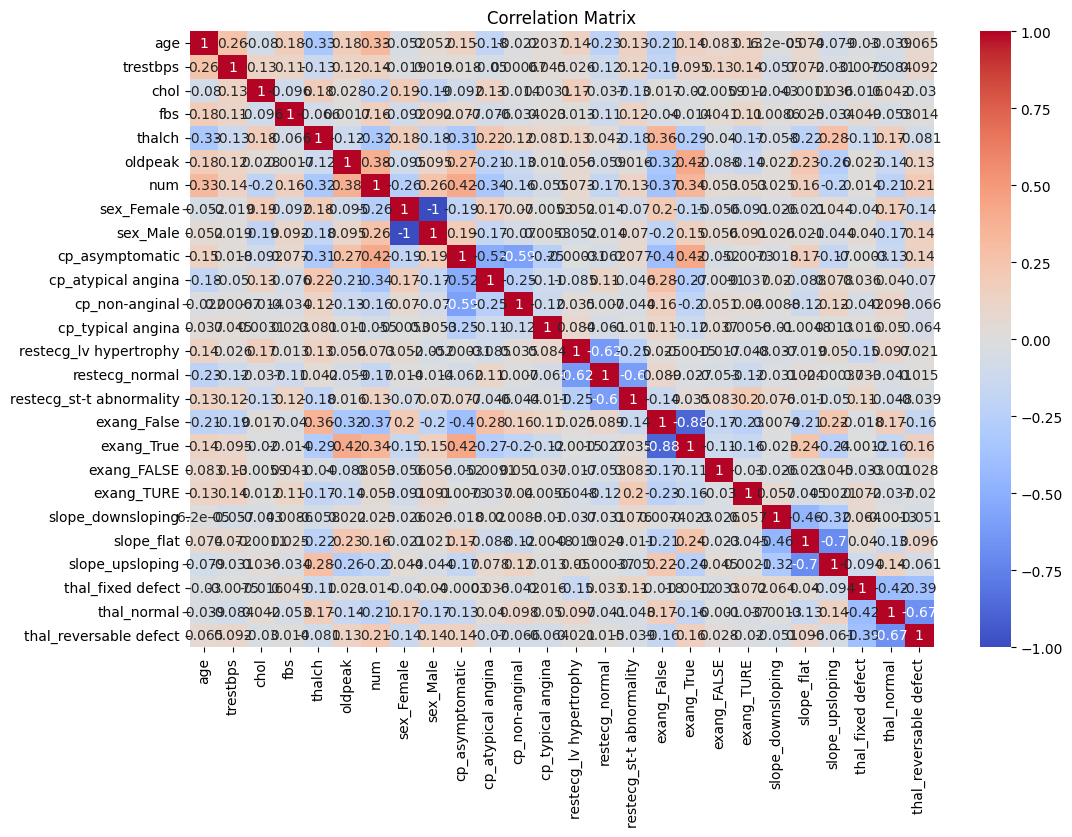

In [85]:
# Correlation matrix
corr_matrix = df_encoded.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [86]:
df2 = df_encoded
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       907 non-null    int32
 1   trestbps                  907 non-null    int32
 2   chol                      907 non-null    int32
 3   fbs                       907 non-null    int32
 4   thalch                    907 non-null    int32
 5   oldpeak                   907 non-null    int32
 6   num                       907 non-null    int32
 7   sex_Female                907 non-null    int32
 8   sex_Male                  907 non-null    int32
 9   cp_asymptomatic           907 non-null    int32
 10  cp_atypical angina        907 non-null    int32
 11  cp_non-anginal            907 non-null    int32
 12  cp_typical angina         907 non-null    int32
 13  restecg_lv hypertrophy    907 non-null    int32
 14  restecg_normal            907 non-null    

# 4. Decision Tree Classification:
### Split the dataset into training and testing sets (e.g., using an 80-20 split).
### Implement a Decision Tree Classification model using a library like scikit-learn.
### Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [87]:
# Splitting the dataset into features (X) and target (y)
X = df2.drop(columns=['num']) 
y = df2['num'] 

In [88]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# To check the size of the splits
X_train.shape, X_test.shape

((725, 25), (182, 25))

In [89]:
# Implementing a Desion Tree Classification Model
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data 
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)


In [90]:
# Calculate evvalution metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5604395604395604
Precision: 0.5461145400228057
Recall: 0.5604395604395604
F1 Score: 0.5526569653120521
ROC AUC Score: 0.6267962426386677


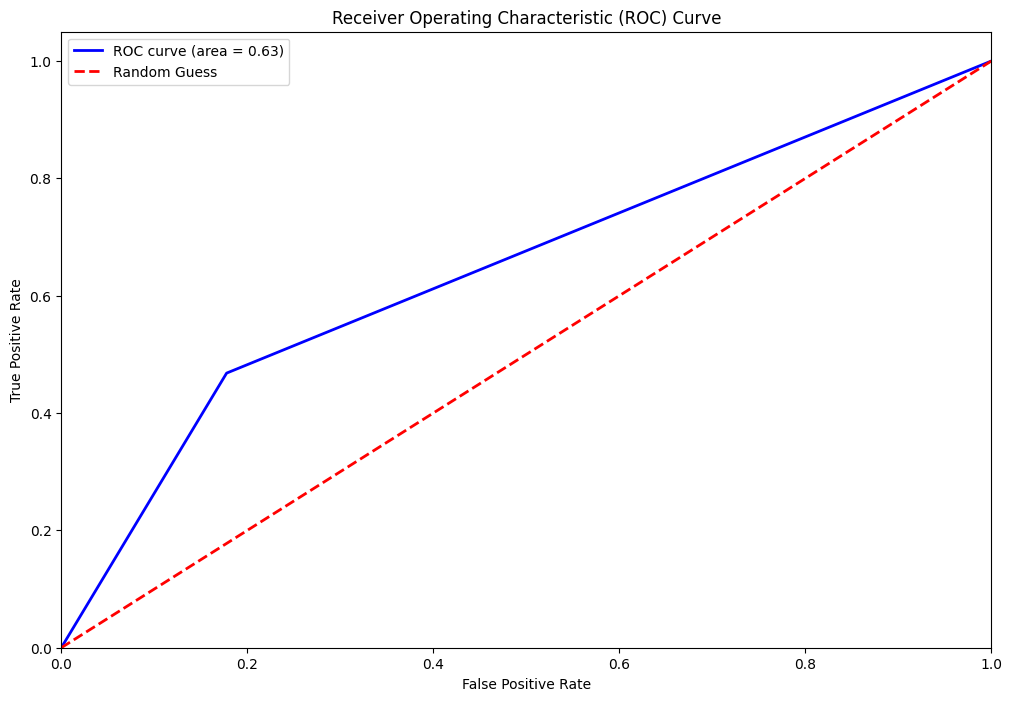

In [91]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=1)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.show()

# 5. Hyperparameter Tuning:
### Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [92]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Set:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy on Testing Set: 0.5769230769230769


In [93]:
"""After tuning the hyperparameters, model achieved a higher accuracy
  on the testing set compared to the previous results"""

'After tuning the hyperparameters, model achieved a higher accuracy\n  on the testing set compared to the previous results'

# 6. Model Evaluation and Analysis:
### Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
### Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [94]:
# Before hyperparameter implementation
before_accuracy = 0.5604395604395604
before_precision = 0.5461145400228057
before_recall = 0.5604395604395604
before_f1_score = 0.552656965312052
before_roc_auc_score = 0.6267962426386677

# After hyperparameter implementation
after_best_parameters = {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
after_accuracy = 0.5769230769230769

print("Performance Insights:")
print("------------------------------")
print("Before Hyperparameter Tuning:")
print("  Accuracy:", before_accuracy)
print("  Precision:", before_precision)
print("  Recall:", before_recall)
print("  F1 Score:", before_f1_score)
print("  ROC AUC Score:", before_roc_auc_score)
print("\nAfter Hyperparameter Tuning:")
print("  Best Parameters:", after_best_parameters)
print("  Accuracy on Testing Set:", after_accuracy)


Performance Insights:
------------------------------
Before Hyperparameter Tuning:
  Accuracy: 0.5604395604395604
  Precision: 0.5461145400228057
  Recall: 0.5604395604395604
  F1 Score: 0.552656965312052
  ROC AUC Score: 0.6267962426386677

After Hyperparameter Tuning:
  Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
  Accuracy on Testing Set: 0.5769230769230769


# Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [95]:
"""Decision tree models have several hyperparameters that can be tuned to optimize model performance. 
   Some common hyperparameters include:

   Max Depth:
     Limits the maximum depth of the tree. Increasing this parameter may lead to a more complex model, 
     which can capture more intricate patterns in the data but also increases the risk of overfitting.

   Min Samples Split:
      Specifies the minimum number of samples required to split an internal node. 
      Increasing this parameter can prevent the tree from splitting too early, which helps to reduce overfitting.
   
   Max Features:
      Controls the number of features to consider when looking for the best split. 
      Limiting the number of features can help to reduce the model's complexity and improve its generalization performance."""

"Decision tree models have several hyperparameters that can be tuned to optimize model performance. \n   Some common hyperparameters include:\n\n   Max Depth:\n     Limits the maximum depth of the tree. Increasing this parameter may lead to a more complex model, \n     which can capture more intricate patterns in the data but also increases the risk of overfitting.\n\n   Min Samples Split:\n      Specifies the minimum number of samples required to split an internal node. \n      Increasing this parameter can prevent the tree from splitting too early, which helps to reduce overfitting.\n   \n   Max Features:\n      Controls the number of features to consider when looking for the best split. \n      Limiting the number of features can help to reduce the model's complexity and improve its generalization performance."

### 2. What is the difference between the Label encoding and One-hot encoding?

In [96]:
""" Label Encoding: 
    Label Encoding is a common technique for converting categorical variables into numerical values. 
    Each unique category value is assigned a unique integer based on alphabetical or numerical ordering.

    One-hot Encoding:
    One-Hot Encoding is another popular technique for treating categorical variables. 
    It simply creates additional features based on the number of unique values in the categorical feature. 
    Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables."""

' Label Encoding: \n    Label Encoding is a common technique for converting categorical variables into numerical values. \n    Each unique category value is assigned a unique integer based on alphabetical or numerical ordering.\n\n    One-hot Encoding:\n    One-Hot Encoding is another popular technique for treating categorical variables. \n    It simply creates additional features based on the number of unique values in the categorical feature. \n    Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.'